<a href="https://colab.research.google.com/github/Young-Z/deep-learning/blob/master/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

raw_df = pd.read_csv("train.csv", header=0)
raw_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


In [159]:
raw_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.1,NaN,S


In [160]:
raw_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
                ...   
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

In [161]:
raw_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

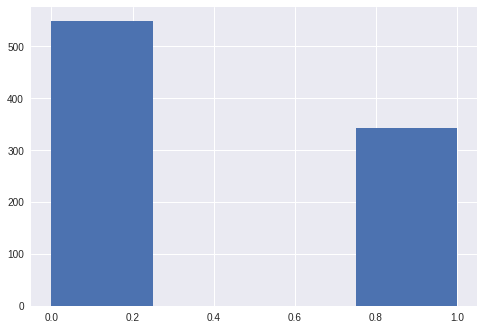

In [162]:
raw_df["Survived"].hist(alpha=1, bins=4)

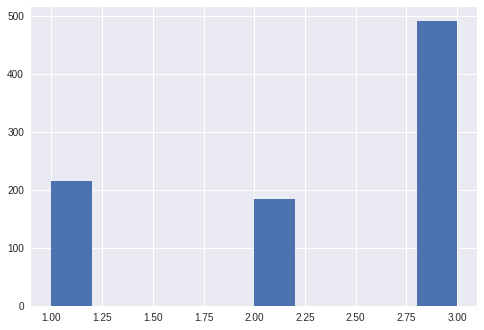

In [163]:
raw_df["Pclass"].hist(alpha=1)

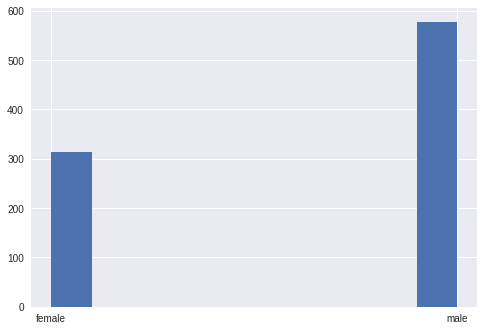

In [164]:
raw_df["Sex"].hist(alpha=1)

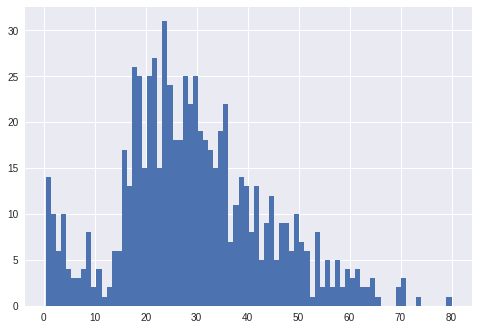

In [165]:
raw_df["Age"].hist(alpha=1, bins=80)

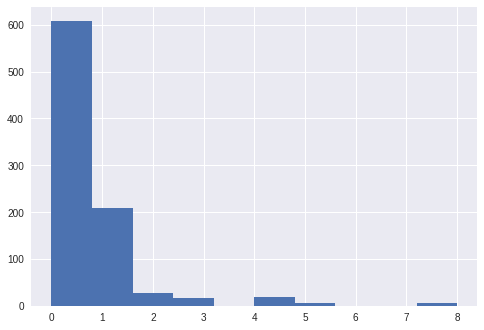

In [166]:
raw_df["SibSp"].hist(alpha=1)

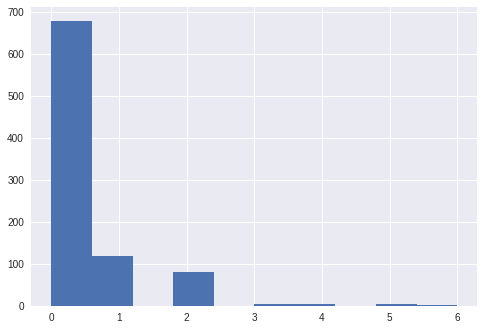

In [167]:
raw_df["Parch"].hist(alpha=1)

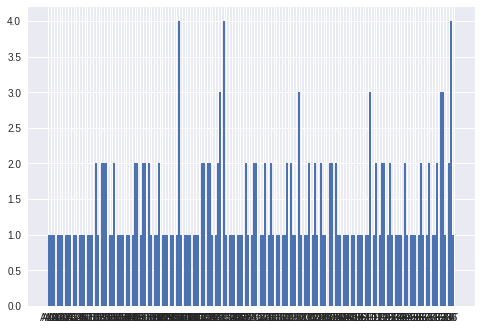

In [168]:
raw_df["Cabin"].hist(bins=200)

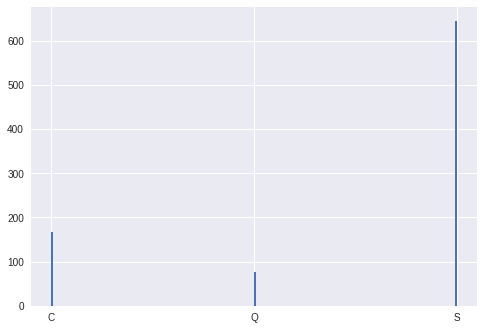

In [169]:
raw_df["Embarked"].hist(bins=200)

In [0]:
  feature_columns_info = { "PassengerId": {"name":"PassengerId", "isNorm": False, "copyRawData": True, "type": "numerical"},
                          "Survived":{"name":"Survived", "isNorm": False},
                          "Pclass":{"name":"Pclass", "isNorm": False, "copyRawData": True, "type": "numerical"},
                          "Sex":{"name":"Sex", "isNorm": False, "type": "numerical"},
                          "Age":{"name":"Age", "isNorm": False, "copyRawData": True, "type": "bucketized", "boundaries": [10, 20, 30, 40, 50, 60, 70]},
                          "SibSp":{"name":"SibSp", "isNorm": False, "copyRawData": True, "type": "numerical"},
                          "Parch":{"name":"Parch", "isNorm": False, "copyRawData": True, "type": "numerical"},
                          "Fare":{"name":"Fare", "isNorm": False, "copyRawData": True},
                          "Cabin":{"name":"Cabin", "isNorm": False, "copyRawData": True, "type": "categorical"},
                          "Embarked":{"name":"Embarked", "isNorm": False, "copyRawData": True, "type": "categorical"}
                    }

In [171]:
a= [feature_columns_info[feature_name]["name"] for feature_name in feature_columns_info if feature_columns_info[feature_name].get("copyRawData")]
a

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

In [0]:
def preprocess_features(raw_df, feature_columns_info):
  """Prepares input features from raw data set.

  Args:
    raw_df: A Pandas DataFrame expected to contain raw data set.
  Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
  """
#   selected_features = raw_df[
#     ["field1",
#      "field2",
#   ]]
#   processed_features = selected_features.copy()

  processed_features = raw_df[[feature_columns_info[feature_name]["name"] for feature_name in feature_columns_info if feature_columns_info[feature_name].get("copyRawData")]].copy()
  # Create a synthetic feature.
  processed_features["Sex"] = raw_df["Sex"].replace(['female','male'],[0,1])
#   processed_features = processed_features.join(pd.get_dummies(raw_df["Cabin"], prefix="Cabin"))
#   processed_features = processed_features.join(pd.get_dummies(raw_df["Embarked"], prefix="Embarked"))
#   processed_features["Age"] = pd.cut(raw_df["Age"], bins=12)
#   processed_features["SibSp"] = (raw_df["SibSp"] - raw_df["SibSp"].mean())/(raw_df["SibSp"].max() - raw_df["SibSp"].min())
#   processed_features["Parch"] = (raw_df["Parch"] - raw_df["Parch"].mean())/(raw_df["Parch"].max() - raw_df["Parch"].min())
  return processed_features

def preprocess_targets(raw_df):
  """Prepares target features (i.e., labels) from California housing data set.

  Args:
    raw_df: A Pandas DataFrame expected to contain raw data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
  output_targets["Survived"] = raw_df["Survived"]
  return output_targets



In [0]:
def construct_feature_columns(input_features, feature_columns_info):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  numerical_features = [tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features if feature_columns_info[my_feature].get("type") == "numericial"]
  categorical_features = [tf.feature_column.categorical_column_with_vocabulary_list(my_feature, vocabulary_list=input_features[my_feature].unique())
              for my_feature in input_features if feature_columns_info[my_feature].get("type") == "categorical"]
  bucketized_features = [tf.feature_column.bucketized_column(tf.feature_column.numeric_column(my_feature), boundaries=feature_columns_info[my_feature].get("boundaries"))
              for my_feature in input_features if feature_columns_info[my_feature].get("type") == "bucketized"]
  
  return set(numerical_features + categorical_features + bucketized_features)

In [174]:
def _parse_function(record, feature_columns_info):
  """Extracts features and labels.
  
  Args:
    record: File path to a TFRecord file    
  Returns:
    A `tuple` `(labels, features)`:
      features: A dict of tensors representing the features
      labels: A tensor with the corresponding labels.
  """
  features = {
    "Pclass": tf.FixedLenFeature([], dtype=tf.int64),
    "Parch": tf.FixedLenFeature([], dtype=tf.float64),
    "SibSp": tf.FixedLenFeature([], dtype=tf.float64),
    "Fare": tf.FixedLenFeature([], dtype=tf.float64),
    "Sex": tf.FixedLenFeature([], dtype=tf.int64),
    "Age": tf.FixedLenFeature([], dtype=tf.int64),
    "Cabin": tf.FixedLenFeature([], dtype=tf.string),
    "Embarked": tf.FixedLenFeature([], dtype=tf.string),
    "Survived": tf.FixedLenFeature([], dtype=tf.int64)
  }

# Survived         int64
# Pclass           int64
# Name            object
# Sex             object
#                 ...   
# Parch            int64
# Ticket          object
# Fare           float64
# Cabin           object
# Embarked        object
  
#   [{"name":"PassengerId", "isNorm": False, "copyRawData": True, "type": "numerical"},
#                           {"name":"Survived", "isNorm": False},
#                           {"name":"Pclass", "isNorm": False, "copyRawData": True, "type": "numerical"},
#                           {"name":"Sex", "isNorm": False, "type": "numerical"},
#                           {"name":"Age", "isNorm": False, "type": "categorical"},
#                           {"name":"SibSp", "isNorm": False, "type": "numerical"},
#                           {"name":"Parch", "isNorm": False, "type": "numerical"},
#                           {"name":"Fare", "isNorm": False, "copyRawData": True},
#                           {"name":"Cabin", "isNorm": False, "copyRawData": True, "type": "categorical"},
#                           {"name":"Embarked", "isNorm": False, "copyRawData": True, "type": "categorical"}
#                          ]
  
  parsed_features = tf.parse_single_example(record, features)

  return  {
    "Pclass": parsed_features["Pclass"],
    "Parch": parsed_features["Parch"],
    "SibSp": parsed_features["SibSp"],
    "Fare": parsed_features["Fare"],
    "Sex": parsed_features["Sex"],
    "Age": parsed_features["Age"],
    "Cabin": parsed_features["Cabin"],
    "Embarked": parsed_features["Embarked"]
  }, parsed_features['Survived']

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a neural network model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features, targets)) # warning: 2GB limit
#     ds.map(lambda record: _parse_function(record, feature_columns_info))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

training_examples = preprocess_features(raw_df.head(650), feature_columns_info)
training_targets = preprocess_targets(raw_df.head(650))
validation_examples = preprocess_features(raw_df.tail(241), feature_columns_info)
validation_targets = preprocess_targets(raw_df.tail(241))
training_targets.describe()

,Survived
count,650.0
mean,0.4
std,0.5
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


In [175]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.1,NaN,S


In [176]:
training_examples["SibSp"].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: SibSp, dtype: int64

In [177]:
training_examples["Parch"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

In [178]:
training_examples.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex
count,650.0,650.0,514.0,650.0,650.0,650.0,650.0
mean,325.5,2.3,29.9,0.5,0.4,31.5,0.6
std,187.8,0.8,14.6,1.1,0.8,45.1,0.5
min,1.0,1.0,0.8,0.0,0.0,0.0,0.0
25%,163.2,2.0,21.0,0.0,0.0,7.9,0.0
50%,325.5,3.0,28.0,0.0,0.0,15.0,1.0
75%,487.8,3.0,38.0,1.0,0.0,30.6,1.0
max,650.0,3.0,80.0,8.0,5.0,512.3,1.0


In [179]:
training_examples.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex
0,1,3,22.0,1,0,7.2,NaN,S,1
1,2,1,38.0,1,0,71.3,C85,C,0
2,3,3,26.0,0,0,7.9,NaN,S,0
3,4,1,35.0,1,0,53.1,C123,S,0
4,5,3,35.0,0,0,8.1,NaN,S,1


In [180]:
training_targets.describe()

,Survived
count,650.0
mean,0.4
std,0.5
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


In [0]:
def train_nn_regression_model(
    my_optimizer,
    steps,
    batch_size,
    hidden_units,
    feature_columns,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    my_optimizer: An instance of `tf.train.Optimizer`, the optimizer to use.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    hidden_units: A `list` of int values, specifying the number of neurons in each layer.
    feature_columns: A `set` specifying the input feature columns to use.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearClassifier` object trained on the training data.
  """

  periods = 7
  steps_per_period = steps / periods

  # Create a linear classifier object.
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  dnn_classifier = tf.estimator.DNNClassifier(
      feature_columns=feature_columns,
      hidden_units=hidden_units,
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets, 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets, 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets, 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on validation data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    dnn_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    training_probabilities = dnn_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = dnn_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    # Compute training and validation loss.
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, validation_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return dnn_classifier

In [157]:
_ = train_nn_regression_model(
    my_optimizer=tf.train.AdagradOptimizer(learning_rate=0.0007),
    steps=5000,
    batch_size=70,
    hidden_units=[10, 10],
    feature_columns=construct_feature_columns(training_examples, feature_columns_info),
    training_examples=training_examples,
    training_targets=training_targets["Survived"],
    validation_examples=validation_examples,
    validation_targets=validation_targets["Survived"])


Training model...
LogLoss (on validation data):


TypeError: ignored